In [88]:
import numpy as np
import matplotlib.pyplot as plt

In [89]:
data =  np.load('mit-bih-arr-eq.npy') # np.load('mit-bih-arr-eq.npy')

In [90]:
data.shape

(5000, 2001)

In [91]:
X, y = data[:,:-1], data[:,-1]
n, p = X.shape

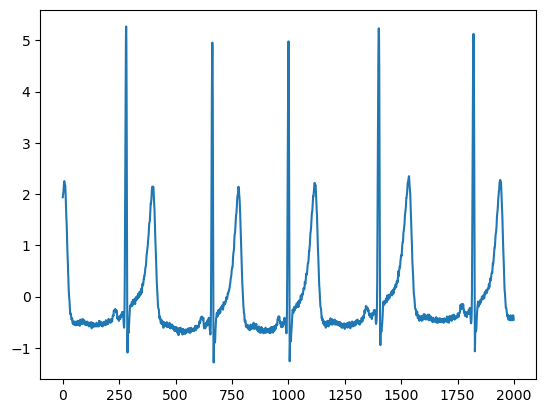

In [92]:
ind_example = np.random.randint(n)
plt.plot(X[ind_example]) 

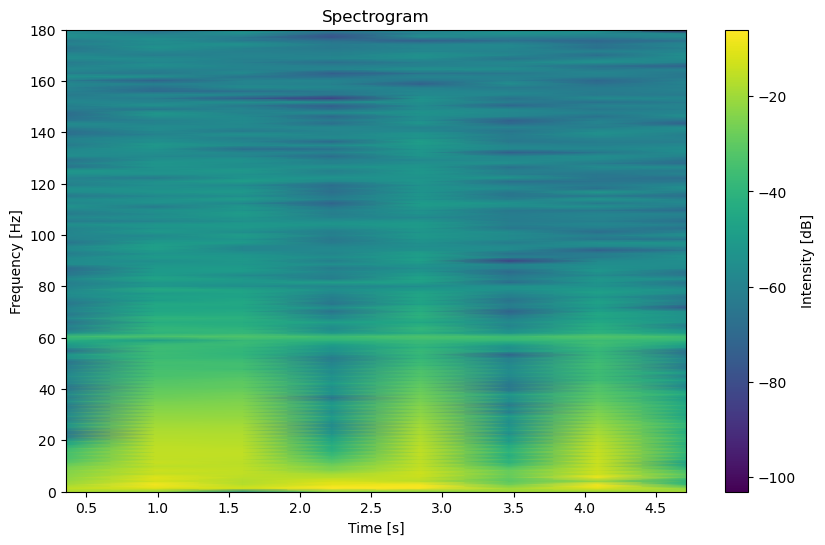

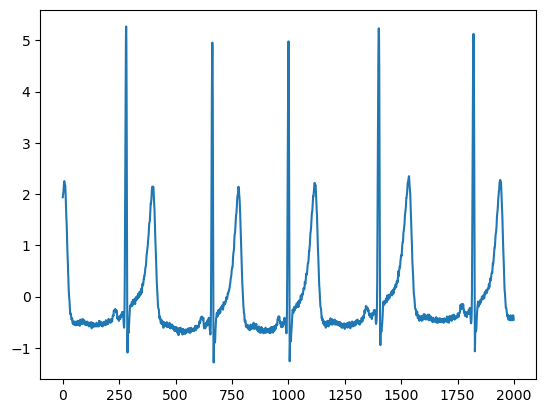

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Generate a sample signal
fs = 360#1000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
# Sample signal: a combination of two sinusoidal waves
signal = X[ind_example]#np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t**2)

# Compute the spectrogram
frequencies, times, Sxx = spectrogram(signal, fs)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title('Spectrogram')
plt.colorbar(label='Intensity [dB]')
plt.show()
plt.plot(X[ind_example]) 

In [94]:
import h5py
import torch

In [95]:
def load_dict_from_hdf5(filename):
    """
    Load a dictionary of lists of arrays from an HDF5 file.

    Parameters:
    filename (str): The name of the HDF5 file to load the data from.

    Returns:
    dict: The dictionary containing lists of arrays.
    """
    data_dict = {}
    with h5py.File(filename, 'r') as hdf5_file:
        for key in hdf5_file.keys():
            group = hdf5_file[key]
            data_dict[key] = np.array([group[f'array_{i}'][...] for i in range(len(group))])
    return data_dict

data_dict = load_dict_from_hdf5('final_data.h5')

In [96]:
X = []
y = []

target = 0
skip = True
for key,value in data_dict.items():
    # if  skip:
    #     skip  = False
    #     continue
    n = value.shape[0]
    X.append(torch.tensor(np.array(value)))
    y.append(torch.ones(n,dtype=int)*target)
    target+=1

X = torch.cat(X).squeeze()
y = torch.cat(y)
X = X.numpy()
y = y.numpy()
n, p = X.shape

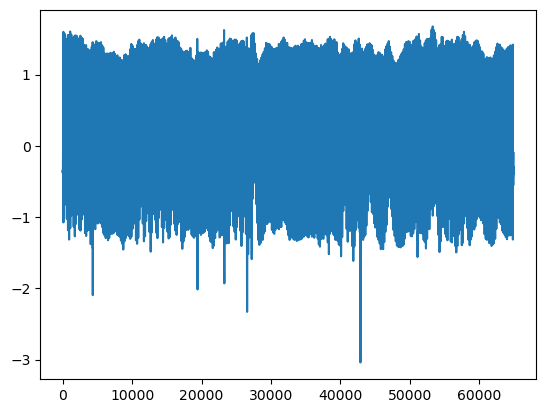

In [97]:
ind_example = np.random.randint(n)
plt.plot(X[ind_example]) 

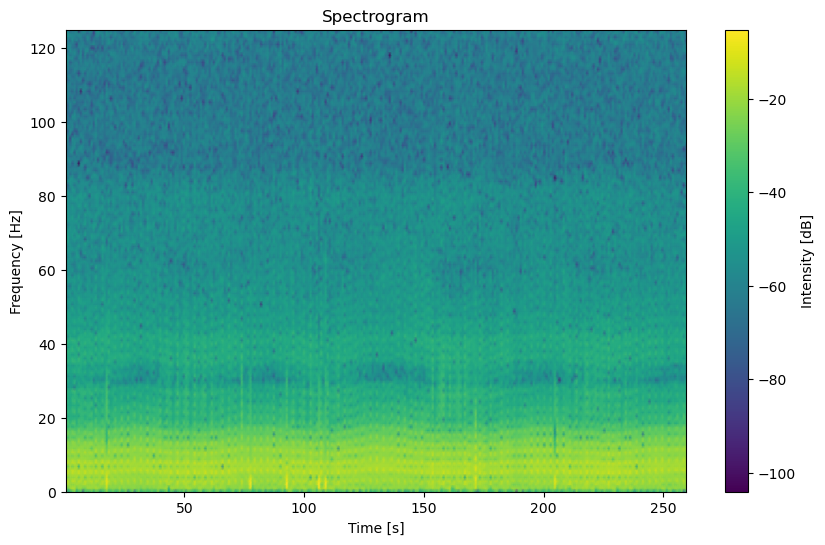

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Generate a sample signal
fs = 250#1000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
# Sample signal: a combination of two sinusoidal waves
signal = X[ind_example] # np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t**2)

# Compute the spectrogram
frequencies, times, Sxx = spectrogram(signal, fs,window=('tukey',0.25))

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title('Spectrogram')
plt.colorbar(label='Intensity [dB]')
plt.show()


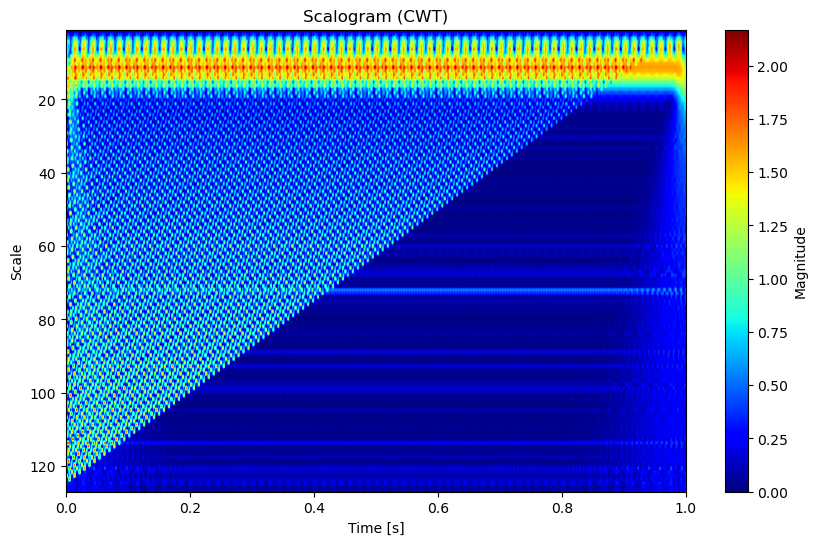

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Generate a sample signal
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
# Sample signal: a combination of two sinusoidal waves with different frequencies
signal = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)

# Define the wavelet to use and scales
wavelet = 'cmor'  # Complex Morlet wavelet
scales = np.arange(1, 128)

# Compute the Continuous Wavelet Transform (CWT)
coefficients, frequencies = pywt.cwt(signal, scales, wavelet, sampling_period=1/fs)

# Plot the scalogram
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coefficients), extent=[0, 1, scales[-1], scales[0]], cmap='jet', aspect='auto')
plt.colorbar(label='Magnitude')
plt.ylabel('Scale')
plt.xlabel('Time [s]')
plt.title('Scalogram (CWT)')
plt.show()


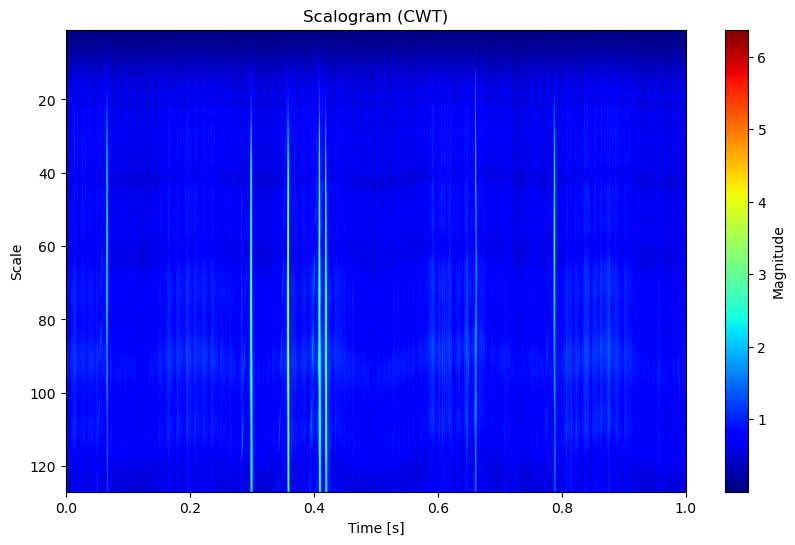

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Generate a sample signal
fs = 250 # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
# Sample signal: a combination of two sinusoidal waves with different frequencies
signal = X[ind_example] # np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)

# Define the wavelet to use and scales
wavelet = 'cmor'  # Complex Morlet wavelet
scales = np.arange(1, 128)

# Compute the Continuous Wavelet Transform (CWT)
coefficients, frequencies = pywt.cwt(signal, scales, wavelet, sampling_period=1/fs)

# Plot the scalogram
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coefficients), extent=[0, 1, scales[-1], scales[0]], cmap='jet', aspect='auto')
plt.colorbar(label='Magnitude')
plt.ylabel('Scale')
plt.xlabel('Time [s]')
plt.title('Scalogram (CWT)')
plt.show()


In [101]:
hrvs = np.load('hrv_signals.npy')

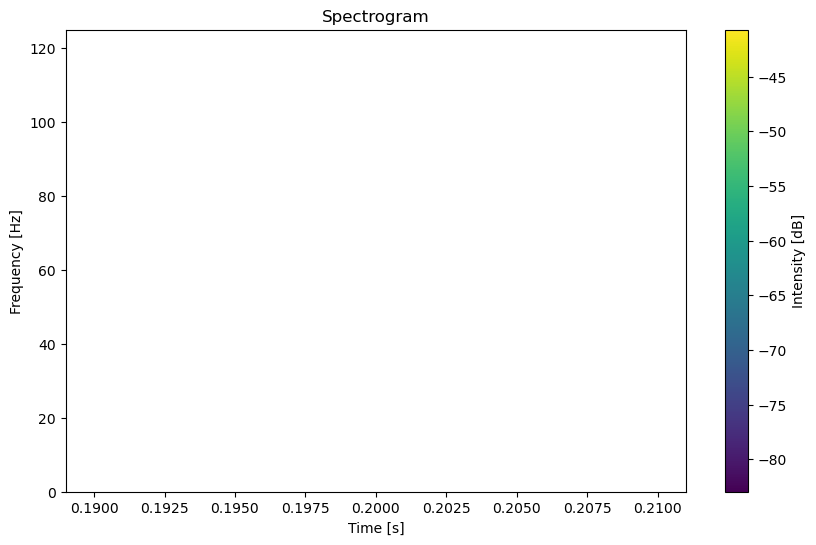

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Generate a sample signal
fs = 250#1000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
# Sample signal: a combination of two sinusoidal waves
signal = hrvs[0] # np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t**2)

# Compute the spectrogram
frequencies, times, Sxx = spectrogram(signal, fs,window=('tukey',0.25))

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title('Spectrogram')
plt.colorbar(label='Intensity [dB]')
plt.show()


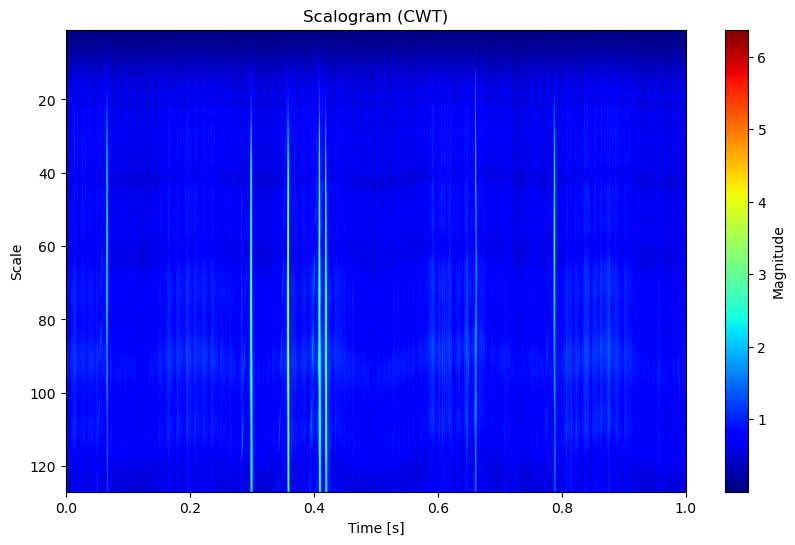

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Generate a sample signal
fs = 250 # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
# Sample signal: a combination of two sinusoidal waves with different frequencies
signal = X[ind_example] # np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)

# Define the wavelet to use and scales
wavelet = 'cmor'  # Complex Morlet wavelet
scales = np.arange(1, 128)

# Compute the Continuous Wavelet Transform (CWT)
coefficients, frequencies = pywt.cwt(signal, scales, wavelet, sampling_period=1/fs)

# Plot the scalogram
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coefficients), extent=[0, 1, scales[-1], scales[0]], cmap='jet', aspect='auto')
plt.colorbar(label='Magnitude')
plt.ylabel('Scale')
plt.xlabel('Time [s]')
plt.title('Scalogram (CWT)')
plt.show()
